In [362]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [363]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [364]:
train.shape, test.shape

((891, 12), (418, 11))

In [365]:
test.shape, train.shape

((418, 11), (891, 12))

In [366]:
train.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [367]:
test.head()

PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

In [368]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [369]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [370]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [371]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

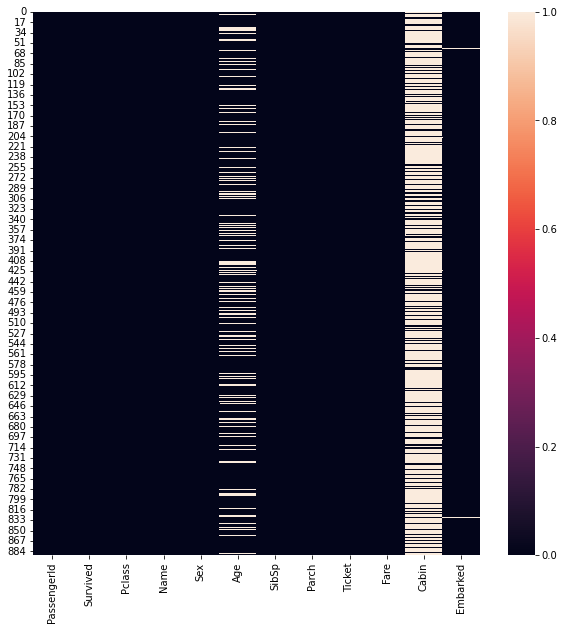

In [372]:
import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(train.isnull(), cbar=True)

# New Section

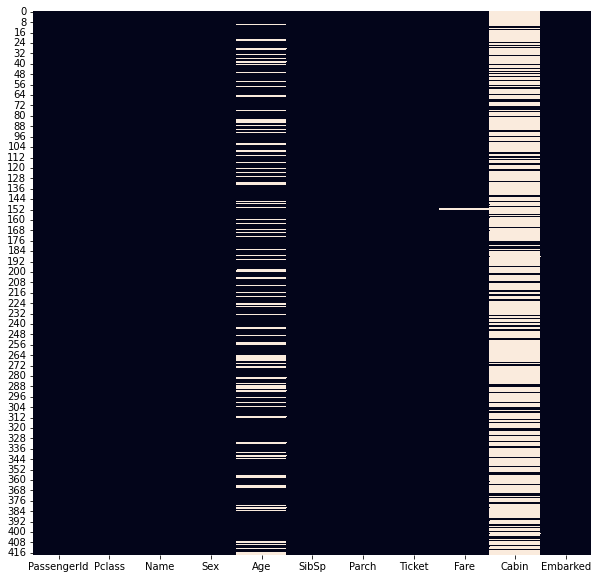

In [373]:
plt.subplots(figsize=(10,10))
sns.heatmap(test.isnull(), cbar=False)

In [374]:
features_nan=[feature for feature in train.columns if train[feature].isnull().sum()>0]

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(train[feature].isnull().mean()*100,3)))

Age: 19.865% missing values
Cabin: 77.104% missing values
Embarked: 0.224% missing values


In [375]:
features_nan=[feature for feature in test.columns if test[feature].isnull().sum()>0]

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(test[feature].isnull().mean()*100,3)))

Age: 20.574% missing values
Fare: 0.239% missing values
Cabin: 78.23% missing values


In [376]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [377]:
train['Embarked'] = train['Embarked'].fillna((train['Embarked'].mode().iloc[0]))
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [378]:
test['Fare'] = test['Fare'].fillna((test['Fare'].mode().iloc[0]))
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [379]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [380]:
categorical_features = train.select_dtypes(include=[object])
categorical_features.columns


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [381]:
train.Name.value_counts().sort_values(ascending=False)

Uruchurtu, Don. Manuel E                         1
Stead, Mr. William Thomas                        1
Bradley, Mr. George ("George Arthur Brayton")    1
Brown, Mrs. James Joseph (Margaret Tobin)        1
Drazenoic, Mr. Jozef                             1
                                                ..
O'Connor, Mr. Maurice                            1
Kantor, Mr. Sinai                                1
Lang, Mr. Fang                                   1
Bishop, Mr. Dickinson H                          1
Taussig, Mr. Emil                                1
Name: Name, Length: 891, dtype: int64

In [382]:
test.Name.value_counts().sort_values(ascending=False)

Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)    1
Clark, Mrs. Walter Miller (Virginia McDowell)     1
Olsen, Master. Artur Karl                         1
Drapkin, Miss. Jennie                             1
Sage, Mr. John George                             1
                                                 ..
Rosenshine, Mr. George (Mr George Thorne")"       1
Cacic, Miss. Manda                                1
Hocking, Miss. Ellen Nellie""                     1
Lennon, Miss. Mary                                1
Thomas, Mr. Tannous                               1
Name: Name, Length: 418, dtype: int64

In [383]:
train.Sex.value_counts().sort_values(ascending=False)

male      577
female    314
Name: Sex, dtype: int64

In [384]:
train.Ticket.value_counts().sort_values(ascending=False)

347082      7
CA. 2343    7
1601        7
347088      6
CA 2144     6
           ..
8475        1
2687        1
343120      1
PC 17476    1
250643      1
Name: Ticket, Length: 681, dtype: int64

In [385]:
train.Embarked.value_counts().sort_values(ascending=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [386]:
train.Pclass.value_counts().sort_values(ascending=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [387]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [388]:
train.head(5)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [389]:
test.head(5)

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S

In [390]:
train.SibSp.value_counts().sort_values(ascending=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [391]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [392]:
train["Sex"].replace(["male","female"],[1,0],inplace=True)
test["Sex"].replace(["male","female"],[1,0],inplace=True)

In [393]:
train.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    1  22.0      1      0   7.2500        S
1         1       1    0  38.0      1      0  71.2833        C
2         1       3    0  26.0      0      0   7.9250        S
3         1       1    0  35.0      1      0  53.1000        S
4         0       3    1  35.0      0      0   8.0500        S

In [394]:
test.head()

Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0       3    1  34.5      0      0   7.8292        Q
1       3    0  47.0      1      0   7.0000        S
2       2    1  62.0      0      0   9.6875        Q
3       3    1  27.0      0      0   8.6625        S
4       3    0  22.0      1      1  12.2875        S

In [395]:
train_new = pd.get_dummies(train, columns = ["Pclass","Embarked"])
test_new = pd.get_dummies(test, columns = ["Pclass","Embarked"])

In [396]:
train_new.head()

Survived  Sex   Age  SibSp  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0         0    1  22.0      1  ...         1           0           0           1
1         1    0  38.0      1  ...         0           1           0           0
2         1    0  26.0      0  ...         1           0           0           1
3         1    0  35.0      1  ...         0           0           0           1
4         0    1  35.0      0  ...         1           0           0           1

[5 rows x 12 columns]

In [397]:
test_new.head()

Sex   Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0    1  34.5      0      0  ...         1           0           1           0
1    0  47.0      1      0  ...         1           0           0           1
2    1  62.0      0      0  ...         0           0           1           0
3    1  27.0      0      0  ...         1           0           0           1
4    0  22.0      1      1  ...         1           0           0           1

[5 rows x 11 columns]

Handling missing values of Age

In [398]:
df = train_new[train_new["Age"].isnull()]
df

Survived  Sex  Age  SibSp  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
5           0    1  NaN      0  ...         1           0           1           0
17          1    1  NaN      0  ...         0           0           0           1
19          1    0  NaN      0  ...         1           1           0           0
26          0    1  NaN      0  ...         1           1           0           0
28          1    0  NaN      0  ...         1           0           1           0
..        ...  ...  ...    ...  ...       ...         ...         ...         ...
859         0    1  NaN      0  ...         1           1           0           0
863         0    0  NaN      8  ...         1           0           0           1
868         0    1  NaN      0  ...         1           0           0           1
878         0    1  NaN      0  ...         1           0           0           1
888         0    0  NaN      1  ...         1           0           0           1

[177 rows x 12 columns]

In [399]:
x_test = df.drop(['Age',"Survived"], axis=1)
x_test

Sex  SibSp  Parch     Fare  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
5      1      0      0   8.4583  ...         1           0           1           0
17     1      0      0  13.0000  ...         0           0           0           1
19     0      0      0   7.2250  ...         1           1           0           0
26     1      0      0   7.2250  ...         1           1           0           0
28     0      0      0   7.8792  ...         1           0           1           0
..   ...    ...    ...      ...  ...       ...         ...         ...         ...
859    1      0      0   7.2292  ...         1           1           0           0
863    0      8      2  69.5500  ...         1           0           0           1
868    1      0      0   9.5000  ...         1           0           0           1
878    1      0      0   7.8958  ...         1           0           0           1
888    0      1      2  23.4500  ...         1           0           0           1

[177 rows x 10 columns]

In [400]:
df1 = train_new.dropna()
x_train = df1.drop(['Age',"Survived"], axis=1)
x_train.shape

(714, 10)

In [401]:
y_train = df1['Age']
y_train

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [402]:
y_train.shape

(714,)

In [403]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
y_pred


array([31.33860781, 33.51756643, 23.09868532, 26.06771192, 28.38236131,
       28.89383248, 31.74749935, 28.38521261, 26.06761923, 26.05290811,
       28.89042945, 27.27771729, 28.38521261, 17.93774772, 43.91304495,
       41.24379895, 21.25733218, 28.89383248, 28.89042945, 28.38438503,
       28.89042945, 28.89042945, 28.89383248, 28.8964984 , 24.11779472,
       28.89042945, 31.35423921, 18.13134054, 21.46591199, 28.90670527,
       28.87691225, -5.16647463, 39.78579329, 44.12435464, 16.06171661,
       -8.13550124, 30.63140082, 43.59304594, 24.30869068, 31.35423921,
       28.38521261, -5.16647463, 27.44875124, 28.89383248, 13.09269001,
       25.9324373 , 19.03365687, 24.30869068, 28.90808457, 37.13868316,
       31.35423921, 28.38521261, 44.01235499, 28.38521261, 33.8044621 ,
       44.12269948, 41.24379895, 44.02338944, 28.38521261, 23.20119536,
       33.0200737 , 28.89042945, 36.43946766, -5.16647463, 20.23216875,
       34.87246809, 28.89383248, 21.83826025, 43.9240794 , 26.06

In [404]:
x_test['Age'] = y_pred
x_test['Survived'] = df['Survived']
x_test.head(5)

Sex  SibSp  Parch     Fare  ...  Embarked_Q  Embarked_S        Age  Survived
5     1      0      0   8.4583  ...           1           0  31.338608         0
17    1      0      0  13.0000  ...           0           1  33.517566         1
19    0      0      0   7.2250  ...           0           0  23.098685         1
26    1      0      0   7.2250  ...           0           0  26.067712         0
28    0      0      0   7.8792  ...           1           0  28.382361         1

[5 rows x 12 columns]

In [405]:
df_train = pd.concat([df1,x_test])
df_train

Survived  Sex        Age  ...  Embarked_C  Embarked_Q  Embarked_S
0           0    1  22.000000  ...           0           0           1
1           1    0  38.000000  ...           1           0           0
2           1    0  26.000000  ...           0           0           1
3           1    0  35.000000  ...           0           0           1
4           0    1  35.000000  ...           0           0           1
..        ...  ...        ...  ...         ...         ...         ...
859         0    1  26.067619  ...           1           0           0
863         0    0  -8.135501  ...           0           0           1
868         0    1  28.858430  ...           0           0           1
878         0    1  28.893832  ...           0           0           1
888         0    0  20.220291  ...           0           0           1

[891 rows x 12 columns]

In [406]:
df_train.sort_index(inplace=True)

In [407]:
train_new.head()

Survived  Sex   Age  SibSp  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0         0    1  22.0      1  ...         1           0           0           1
1         1    0  38.0      1  ...         0           1           0           0
2         1    0  26.0      0  ...         1           0           0           1
3         1    0  35.0      1  ...         0           0           0           1
4         0    1  35.0      0  ...         1           0           0           1

[5 rows x 12 columns]

In [408]:
test_new.head()

Sex   Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0    1  34.5      0      0  ...         1           0           1           0
1    0  47.0      1      0  ...         1           0           0           1
2    1  62.0      0      0  ...         0           0           1           0
3    1  27.0      0      0  ...         1           0           0           1
4    0  22.0      1      1  ...         1           0           0           1

[5 rows x 11 columns]

In [409]:
train_new.shape,test_new.shape

((891, 12), (418, 11))

Handling missing values of Age

In [410]:
df = train_new[train_new["Age"].isnull()]
df

Survived  Sex  Age  SibSp  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
5           0    1  NaN      0  ...         1           0           1           0
17          1    1  NaN      0  ...         0           0           0           1
19          1    0  NaN      0  ...         1           1           0           0
26          0    1  NaN      0  ...         1           1           0           0
28          1    0  NaN      0  ...         1           0           1           0
..        ...  ...  ...    ...  ...       ...         ...         ...         ...
859         0    1  NaN      0  ...         1           1           0           0
863         0    0  NaN      8  ...         1           0           0           1
868         0    1  NaN      0  ...         1           0           0           1
878         0    1  NaN      0  ...         1           0           0           1
888         0    0  NaN      1  ...         1           0           0           1

[177 rows x 12 columns]

In [411]:
x_test = df.drop(['Age',"Survived"], axis=1)
x_test

Sex  SibSp  Parch     Fare  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
5      1      0      0   8.4583  ...         1           0           1           0
17     1      0      0  13.0000  ...         0           0           0           1
19     0      0      0   7.2250  ...         1           1           0           0
26     1      0      0   7.2250  ...         1           1           0           0
28     0      0      0   7.8792  ...         1           0           1           0
..   ...    ...    ...      ...  ...       ...         ...         ...         ...
859    1      0      0   7.2292  ...         1           1           0           0
863    0      8      2  69.5500  ...         1           0           0           1
868    1      0      0   9.5000  ...         1           0           0           1
878    1      0      0   7.8958  ...         1           0           0           1
888    0      1      2  23.4500  ...         1           0           0           1

[177 rows x 10 columns]

In [412]:
df1 = train_new.dropna()
x_train = df1.drop(['Age',"Survived"], axis=1)
x_train.shape

(714, 10)

In [413]:
y_train = df1['Age']
y_train

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [414]:
y_train.shape

(714,)

In [415]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
y_pred

array([31.33860781, 33.51756643, 23.09868532, 26.06771192, 28.38236131,
       28.89383248, 31.74749935, 28.38521261, 26.06761923, 26.05290811,
       28.89042945, 27.27771729, 28.38521261, 17.93774772, 43.91304495,
       41.24379895, 21.25733218, 28.89383248, 28.89042945, 28.38438503,
       28.89042945, 28.89042945, 28.89383248, 28.8964984 , 24.11779472,
       28.89042945, 31.35423921, 18.13134054, 21.46591199, 28.90670527,
       28.87691225, -5.16647463, 39.78579329, 44.12435464, 16.06171661,
       -8.13550124, 30.63140082, 43.59304594, 24.30869068, 31.35423921,
       28.38521261, -5.16647463, 27.44875124, 28.89383248, 13.09269001,
       25.9324373 , 19.03365687, 24.30869068, 28.90808457, 37.13868316,
       31.35423921, 28.38521261, 44.01235499, 28.38521261, 33.8044621 ,
       44.12269948, 41.24379895, 44.02338944, 28.38521261, 23.20119536,
       33.0200737 , 28.89042945, 36.43946766, -5.16647463, 20.23216875,
       34.87246809, 28.89383248, 21.83826025, 43.9240794 , 26.06

In [416]:
x_test['Age'] = y_pred
x_test['Survived'] = df['Survived']
x_test.tail(4)

Sex  SibSp  Parch     Fare  ...  Embarked_Q  Embarked_S        Age  Survived
863    0      8      2  69.5500  ...           0           1  -8.135501         0
868    1      0      0   9.5000  ...           0           1  28.858430         0
878    1      0      0   7.8958  ...           0           1  28.893832         0
888    0      1      2  23.4500  ...           0           1  20.220291         0

[4 rows x 12 columns]

In [417]:
df_train = pd.concat([df1,x_test])
df_train

Survived  Sex        Age  ...  Embarked_C  Embarked_Q  Embarked_S
0           0    1  22.000000  ...           0           0           1
1           1    0  38.000000  ...           1           0           0
2           1    0  26.000000  ...           0           0           1
3           1    0  35.000000  ...           0           0           1
4           0    1  35.000000  ...           0           0           1
..        ...  ...        ...  ...         ...         ...         ...
859         0    1  26.067619  ...           1           0           0
863         0    0  -8.135501  ...           0           0           1
868         0    1  28.858430  ...           0           0           1
878         0    1  28.893832  ...           0           0           1
888         0    0  20.220291  ...           0           0           1

[891 rows x 12 columns]

In [418]:
df_train.sort_index(inplace=True)

Predict the Age for Test Set

In [419]:
test_new.head()

Sex   Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0    1  34.5      0      0  ...         1           0           1           0
1    0  47.0      1      0  ...         1           0           0           1
2    1  62.0      0      0  ...         0           0           1           0
3    1  27.0      0      0  ...         1           0           0           1
4    0  22.0      1      1  ...         1           0           0           1

[5 rows x 11 columns]

In [420]:
test_new.head()

Sex   Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0    1  34.5      0      0  ...         1           0           1           0
1    0  47.0      1      0  ...         1           0           0           1
2    1  62.0      0      0  ...         0           0           1           0
3    1  27.0      0      0  ...         1           0           0           1
4    0  22.0      1      1  ...         1           0           0           1

[5 rows x 11 columns]

In [421]:
df3 = test_new[test_new['Age'].isnull()]
df3

Sex  Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
10     1  NaN      0      0  ...         1           0           0           1
22     0  NaN      0      0  ...         0           0           0           1
29     1  NaN      2      0  ...         1           1           0           0
33     0  NaN      1      2  ...         1           0           0           1
36     0  NaN      0      0  ...         1           0           0           1
..   ...  ...    ...    ...  ...       ...         ...         ...         ...
408    0  NaN      0      0  ...         1           0           1           0
410    0  NaN      0      0  ...         1           0           1           0
413    1  NaN      0      0  ...         1           0           0           1
416    1  NaN      0      0  ...         1           0           0           1
417    1  NaN      1      1  ...         1           1           0           0

[86 rows x 11 columns]

In [422]:
a_test = df3.drop(['Age'], axis=1)
a_test

Sex  SibSp  Parch     Fare  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
10     1      0      0   7.8958  ...         1           0           0           1
22     0      0      0  31.6833  ...         0           0           0           1
29     1      2      0  21.6792  ...         1           1           0           0
33     0      1      2  23.4500  ...         1           0           0           1
36     0      0      0   8.0500  ...         1           0           0           1
..   ...    ...    ...      ...  ...       ...         ...         ...         ...
408    0      0      0   7.7208  ...         1           0           1           0
410    0      0      0   7.7500  ...         1           0           1           0
413    1      0      0   8.0500  ...         1           0           0           1
416    1      0      0   8.0500  ...         1           0           0           1
417    1      1      1  22.3583  ...         1           1           0           0

[86 rows x 10 columns]

In [423]:
remains = test_new.dropna()
remains.shape

(332, 11)

In [424]:
remains.head(2)

Sex   Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0    1  34.5      0      0  ...         1           0           1           0
1    0  47.0      1      0  ...         1           0           0           1

[2 rows x 11 columns]

In [425]:
age = remains["Age"]
remains.drop(['Age'],axis=1,inplace=True)
remains['Age'] = age 
remains.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Sex  SibSp  Parch     Fare  ...  Embarked_C  Embarked_Q  Embarked_S   Age
0    1      0      0   7.8292  ...           0           1           0  34.5
1    0      1      0   7.0000  ...           0           0           1  47.0
2    1      0      0   9.6875  ...           0           1           0  62.0
3    1      0      0   8.6625  ...           0           0           1  27.0
4    0      1      1  12.2875  ...           0           0           1  22.0

[5 rows x 11 columns]

In [426]:
b_predict = LR.predict(a_test)
b_predict

array([28.89383248, 41.0282487 , 17.93774772, 20.22029074, 25.92140285,
       27.82128406, 44.11056158, 31.35423921, 30.61972196, 24.80728686,
       30.37198864, 28.89042945, 28.89383248, 36.02533081, 22.00268348,
       28.38521261, 28.8964984 , 28.89042945, 31.35423921, 31.35423921,
       28.87580881, 28.3845682 , 26.08509118, 27.44875124, 31.35423921,
       20.23216875, 22.62550925, 22.17960321, 43.55194261, 44.11056158,
       26.05290811, 28.38558116, 28.9136018 , 38.27477234, 28.9014639 ,
       26.06761923, 31.35423921, -8.13550124, 44.12269948, 25.92002354,
       28.21417865, 41.2874755 , 28.91249835, 28.38236131, 28.89042945,
       21.46591199, 28.38521261, 31.35138791, 28.89401565, 23.18931735,
       19.03365687, 28.9014639 , 31.35423921, 28.89383248, 44.69649081,
       28.9014639 , 25.92140285, 31.35423921, 24.30869068, 26.06771192,
       28.38521261, 28.90808457, 26.06761923, 28.89042945, 43.82256247,
       26.06761923, 17.93774772, 30.63149351, 28.38521261, 28.90

In [427]:
a_test['Age'] = b_predict
a_test

Sex  SibSp  Parch     Fare  ...  Embarked_C  Embarked_Q  Embarked_S        Age
10     1      0      0   7.8958  ...           0           0           1  28.893832
22     0      0      0  31.6833  ...           0           0           1  41.028249
29     1      2      0  21.6792  ...           1           0           0  17.937748
33     0      1      2  23.4500  ...           0           0           1  20.220291
36     0      0      0   8.0500  ...           0           0           1  25.921403
..   ...    ...    ...      ...  ...         ...         ...         ...        ...
408    0      0      0   7.7208  ...           0           1           0  28.385857
410    0      0      0   7.7500  ...           0           1           0  28.385213
413    1      0      0   8.0500  ...           0           0           1  28.890429
416    1      0      0   8.0500  ...           0           0           1  28.890429
417    1      1      1  22.3583  ...           1           0           0  21.100367

[86 rows x 11 columns]

In [428]:
df_test = pd.concat([remains,a_test])
df_test

Sex  SibSp  Parch     Fare  ...  Embarked_C  Embarked_Q  Embarked_S        Age
0      1      0      0   7.8292  ...           0           1           0  34.500000
1      0      1      0   7.0000  ...           0           0           1  47.000000
2      1      0      0   9.6875  ...           0           1           0  62.000000
3      1      0      0   8.6625  ...           0           0           1  27.000000
4      0      1      1  12.2875  ...           0           0           1  22.000000
..   ...    ...    ...      ...  ...         ...         ...         ...        ...
408    0      0      0   7.7208  ...           0           1           0  28.385857
410    0      0      0   7.7500  ...           0           1           0  28.385213
413    1      0      0   8.0500  ...           0           0           1  28.890429
416    1      0      0   8.0500  ...           0           0           1  28.890429
417    1      1      1  22.3583  ...           1           0           0  21.100367

[418 rows x 11 columns]

In [429]:
df_test.sort_index(inplace=True)
df_test.head(11)

Sex  SibSp  Parch     Fare  ...  Embarked_C  Embarked_Q  Embarked_S        Age
0     1      0      0   7.8292  ...           0           1           0  34.500000
1     0      1      0   7.0000  ...           0           0           1  47.000000
2     1      0      0   9.6875  ...           0           1           0  62.000000
3     1      0      0   8.6625  ...           0           0           1  27.000000
4     0      1      1  12.2875  ...           0           0           1  22.000000
5     1      0      0   9.2250  ...           0           0           1  14.000000
6     0      0      0   7.6292  ...           0           1           0  30.000000
7     1      1      1  29.0000  ...           0           0           1  26.000000
8     0      0      0   7.2292  ...           1           0           0  18.000000
9     1      2      0  24.1500  ...           0           0           1  21.000000
10    1      0      0   7.8958  ...           0           0           1  28.893832

[11 rows x 11 columns]

In [430]:
df_train = df_train.round({"Age":1}) 
df_test = df_test.round({"Age":1}) 

In [431]:
df_train

Survived  Sex   Age  SibSp  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0           0    1  22.0      1  ...         1           0           0           1
1           1    0  38.0      1  ...         0           1           0           0
2           1    0  26.0      0  ...         1           0           0           1
3           1    0  35.0      1  ...         0           0           0           1
4           0    1  35.0      0  ...         1           0           0           1
..        ...  ...   ...    ...  ...       ...         ...         ...         ...
886         0    1  27.0      0  ...         0           0           0           1
887         1    0  19.0      0  ...         0           0           0           1
888         0    0  20.2      1  ...         1           0           0           1
889         1    1  26.0      0  ...         0           1           0           0
890         0    1  32.0      0  ...         1           0           1           0

[891 rows x 12 columns]

In [432]:
df_test

Sex  SibSp  Parch      Fare  ...  Embarked_C  Embarked_Q  Embarked_S   Age
0      1      0      0    7.8292  ...           0           1           0  34.5
1      0      1      0    7.0000  ...           0           0           1  47.0
2      1      0      0    9.6875  ...           0           1           0  62.0
3      1      0      0    8.6625  ...           0           0           1  27.0
4      0      1      1   12.2875  ...           0           0           1  22.0
..   ...    ...    ...       ...  ...         ...         ...         ...   ...
413    1      0      0    8.0500  ...           0           0           1  28.9
414    0      0      0  108.9000  ...           1           0           0  39.0
415    1      0      0    7.2500  ...           0           0           1  38.5
416    1      0      0    8.0500  ...           0           0           1  28.9
417    1      1      1   22.3583  ...           1           0           0  21.1

[418 rows x 11 columns]

In [433]:
df_test = df_test[(df_train.drop(['Survived'],axis=1)).columns]
df_test

Sex   Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0      1  34.5      0      0  ...         1           0           1           0
1      0  47.0      1      0  ...         1           0           0           1
2      1  62.0      0      0  ...         0           0           1           0
3      1  27.0      0      0  ...         1           0           0           1
4      0  22.0      1      1  ...         1           0           0           1
..   ...   ...    ...    ...  ...       ...         ...         ...         ...
413    1  28.9      0      0  ...         1           0           0           1
414    0  39.0      0      0  ...         0           1           0           0
415    1  38.5      0      0  ...         1           0           0           1
416    1  28.9      0      0  ...         1           0           0           1
417    1  21.1      1      1  ...         1           1           0           0

[418 rows x 11 columns]

In [434]:
x_train = df_train.drop('Survived', axis=1)
y_train = df_train.Survived

In [435]:
x_train.head()

Sex   Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0    1  22.0      1      0  ...         1           0           0           1
1    0  38.0      1      0  ...         0           1           0           0
2    0  26.0      0      0  ...         1           0           0           1
3    0  35.0      1      0  ...         0           0           0           1
4    1  35.0      0      0  ...         1           0           0           1

[5 rows x 11 columns]

In [436]:
y_train.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [437]:
x_train.shape, y_train.shape

((891, 11), (891,))

K-Fold Cross Validation

In [438]:
from sklearn.model_selection import cross_val_score

def cross_val(Classifier):
    accuracies = cross_val_score(estimator=Classifier, X=x_train, y=y_train, cv=10)
    print(accuracies)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Decision Tree Classifier

In [439]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
cross_val(DTC)

[0.68888889 0.82022472 0.70786517 0.78651685 0.79775281 0.79775281
 0.78651685 0.76404494 0.80898876 0.83146067]
Accuracy: 77.90 %


Random Forest Classifier

In [440]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, criterion='entropy')
RFC.fit(x_train,y_train)
cross_val(RFC)

[0.74444444 0.79775281 0.75280899 0.82022472 0.8988764  0.84269663
 0.80898876 0.78651685 0.83146067 0.84269663]
Accuracy: 81.26 %


XGBoost Classifier

In [441]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
cross_val(XGB)

[0.78888889 0.80898876 0.7752809  0.88764045 0.86516854 0.85393258
 0.87640449 0.78651685 0.83146067 0.84269663]
Accuracy: 83.17 %


AdaBoost Classifier

In [442]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=100)
ABC.fit(x_train,y_train)
cross_val(ABC)


[0.77777778 0.76404494 0.78651685 0.83146067 0.84269663 0.78651685
 0.83146067 0.84269663 0.83146067 0.82022472]
Accuracy: 81.15 %


CatBoost Algorithm

In [443]:
x_train.head(5)

Sex   Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0    1  22.0      1      0  ...         1           0           0           1
1    0  38.0      1      0  ...         0           1           0           0
2    0  26.0      0      0  ...         1           0           0           1
3    0  35.0      1      0  ...         0           0           0           1
4    1  35.0      0      0  ...         1           0           0           1

[5 rows x 11 columns]

In [444]:
y_train.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [445]:
cat_features = np.where(x_train.dtypes != np.float)[0]
cat_features

array([ 0,  2,  3,  5,  6,  7,  8,  9, 10])

In [446]:
!pip install catboost


In [447]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
from catboost import Pool

train_pool = Pool(x_train,
             y_train,
             cat_features)

In [448]:
from catboost import CatBoostClassifier, cv

catboost_model = CatBoostClassifier(iterations=1000,
                                  custom_loss=['Accuracy'],
                                  loss_function='Logloss',
                                   #task_type="GPU",
                                    #devices='0'
                                   )

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(x_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6861496	total: 6.92ms	remaining: 6.92s
1:	learn: 0.6791167	total: 12.2ms	remaining: 6.07s
2:	learn: 0.6731077	total: 15.3ms	remaining: 5.07s
3:	learn: 0.6673493	total: 18.2ms	remaining: 4.53s
4:	learn: 0.6616046	total: 21ms	remaining: 4.18s
5:	learn: 0.6564967	total: 23.3ms	remaining: 3.86s
6:	learn: 0.6511737	total: 26.1ms	remaining: 3.7s
7:	learn: 0.6460964	total: 28.6ms	remaining: 3.54s
8:	learn: 0.6408961	total: 31.2ms	remaining: 3.44s
9:	learn: 0.6348314	total: 34ms	remaining: 3.37s
10:	learn: 0.6298940	total: 36.6ms	remaining: 3.29s
11:	learn: 0.6245581	total: 39.9ms	remaining: 3.29s
12:	learn: 0.6200213	total: 42.7ms	remaining: 3.24s
13:	learn: 0.6151344	total: 45.2ms	remaining: 3.19s
14:	learn: 0.6124979	total: 46.7ms	remaining: 3.07s
15:	learn: 0.6087947	total: 49.4ms	remaining: 3.04s
16:	learn: 0.6045471	total: 51.9ms	remaining: 3s
17:	learn: 0.6003223	total: 54ms	remaining: 2.95s
18:	learn: 0.5953446	total: 56.7ms	remaining: 2.93s
19

In [449]:
import time, datetime
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
24:	learn: 0.4615352	test: 0.4400600	best: 0.4400600 (24)	total: 479ms	remaining: 18.7s
25:	learn: 0.4573445	test: 0.4357832	best: 0.4357832 (25)	total: 486ms	remaining: 18.2s
26:	learn: 0.4540897	test: 0.4316149	best: 0.4316149 (26)	total: 492ms	remaining: 17.7s
27:	learn: 0.4521607	test: 0.4286688	best: 0.4286688 (27)	total: 497ms	remaining: 17.2s
28:	learn: 0.4485961	test: 0.4244530	best: 0.4244530 (28)	total: 504ms	remaining: 16.9s
29:	learn: 0.4456718	test: 0.4216998	best: 0.4216998 (29)	total: 510ms	remaining: 16.5s
30:	learn: 0.4430253	test: 0.4181881	best: 0.4181881 (30)	total: 515ms	remaining: 16.1s
31:	learn: 0.4408679	test: 0.4157111	best: 0.4157111 (31)	total: 520ms	remaining: 15.7s
32:	learn: 0.4406082	test: 0.4155673	best: 0.4155673 (32)	total: 522ms	remaining: 15.3s
33:	learn: 0.4377676	test: 0.4123859	best: 0.4123859 (33)	total: 526ms	remaining: 15s
34:	learn: 0.4355160	test: 0.4109487	best: 0.4109487 (34)	total: 531ms	

In [450]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 87.65
Accuracy cross-validation 10-Fold: 82.5
Running Time: 0:00:58.817754


Predict the Test File

In [451]:
df_test.head()

Sex   Age  SibSp  Parch  ...  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0    1  34.5      0      0  ...         1           0           1           0
1    0  47.0      1      0  ...         1           0           0           1
2    1  62.0      0      0  ...         0           0           1           0
3    1  27.0      0      0  ...         1           0           0           1
4    0  22.0      1      1  ...         1           0           0           1

[5 rows x 11 columns]

In [460]:
XGB_results = XGB.predict(df_test)
print(XGB_results)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [457]:
#XGB_results = XGB.predict_proba(df_test)
#print(XGB_results)

In [461]:
ABC_results = ABC.predict(df_test)
print(ABC_results)

[0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [462]:
catboost_results = catboost_model.predict(df_test)
print(catboost_results)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [463]:
final_results = []
for i in range(len(XGB_results)):
    if XGB_results[i] == ABC_results[i]:
        final_results.append(XGB_results[i])
    elif XGB_results[i] == catboost_results[i]:
        final_results.append(XGB_results[i])
    elif ABC_results[i] == catboost_results[i]:
        final_results.append(ABC_results[i])
print(final_results)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

Upload the Predicted Results into CSV 
File

In [464]:
test1 = pd.read_csv("test.csv")

In [467]:
submission = pd.DataFrame()
submission['PassengerId'] = test1['PassengerId']
submission['Survived'] = final_results

In [468]:
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [469]:
submission.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [471]:
submission.to_csv('MultiAlgoSubmission.csv', index=False)

In [473]:
sub = pd.read_csv('MultiAlgoSubmission.csv')
sub.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [474]:
sub.shape

(418, 2)